In [2]:
from setup import *

# 1. FFPE-only mutations in study 1

Original data is downloaded from supplementary materials of [study1](https://pubmed.ncbi.nlm.nih.gov/29698444/). Here, we excluded mutations which have been detected in fresh frozen tissues and also exclude mutations with probability score over 0.9 from mutation caller MutationSeq in the original study. The remaining mutations have been used to get the following mutation channel counts.

## 1.1 All FFPE-only mutations

In [3]:
whole_channel_fixation = pd.read_csv("./Data/study1_FixationGroup_mutCounts.csv", sep = "\t", 
                                     index_col = "MutationType")
whole_channel_fixation.head(2)

,1.Unrepaired_FFPE.2H,1.Repaired_FFPE.15H,1.Unrepaired_FFPE.15H,1.Unrepaired_FFPE.48H,1.Unrepaired_FFPE.24H,1.Repaired_FFPE.24H,1.Repaired_FFPE.48H,1.Repaired_FFPE.2H,2.Unrepaired_FFPE.2H,2.Repaired_FFPE.15H,...,2.Unrepaired_FFPE.24H,2.Unrepaired_FFPE.48H,3.Repaired_FFPE.2H,3.Repaired_FFPE.15H,3.Unrepaired_FFPE.15H,3.Repaired_FFPE.24H,3.Unrepaired_FFPE.24H,3.Repaired_FFPE.48H,3.Unrepaired_FFPE.48H,3.Unrepaired_FFPE.2H
MutationType,,,,,,,,,,,,,,,,,,,,,
C>A@A_A,1,0,0,0,0,0,0,0,1,2,...,0,0,0,2,3,1,1,1,1,2
C>A@A_C,0,0,0,0,0,0,0,0,0,0,...,0,0,2,3,3,2,2,2,2,2


In [4]:
## getting six basic mutation types:
all_types = np.array([i.split ("@")[0] for i in whole_channel_fixation.index])
basic_mut_type = list(set([i.split ("@")[0] for i in whole_channel_fixation.index]))
basic_mut_type.sort()
basic_mut_type

['C>A', 'C>G', 'C>T', 'T>A', 'T>C', 'T>G']

In [5]:
def bar_plot_sixtype_4timelines(group, labels = True, file = False,  width = 8, 
                                height = 3, basic_mut_type = basic_mut_type):
    
    """Plot the FFPE-only mutations in study 1 at different fixation time points"""
    types = []
    times = []
    counts = []
    patients = []
    
    timelabels = ["2H", '15H', '48H', '24H']
    p_ids = [str(i) + f".{group}" for i in [1,2,3]]
    
    sns.set(style="whitegrid", color_codes=True, rc={"grid.linewidth": 0.5, 'grid.color': '.7', 
                                                     'ytick.major.size': 2,'axes.edgecolor': '.3',
                                                     'axes.linewidth': 1.35,"figure.figsize":(width, height)})    
    for p_id in p_ids:
    
        for tp in basic_mut_type:
            for time in timelabels:
                types.append(tp)
                times.append(time)
                patients.append(p_id)
        
        df_tmp = whole_channel_fixation.loc[:,
                                            [col.split ("_")[0] == p_id for col in whole_channel_fixation.columns]]

        for tp in basic_mut_type:
            counts += list(df_tmp.loc[all_types == tp,:].sum().values)
    
    df = pd.DataFrame({"Types":types, "Fixation_time(Hour)" : np.array([t[:-1] for t in times]).astype("int32"), 
                   "Counts":counts, "ID":patients})
    
    palette = sns.cubehelix_palette(4, start = .5, rot = -.75)
    
    sns.barplot(x = "Types", y = "Counts", hue = "Fixation_time(Hour)", data = df, palette=palette, 
                order = basic_mut_type)
    
    plt.xlabel ("Mutation type", size = 13, color = "black")
    plt.ylabel ("FFPE-only mutation counts", size = 13, color = "black")
    plt.xticks(size  = 10, color = "black")
    plt.yticks(size  = 10, color = "black")
    ## Plot the label on right side
    left, width,  bottom, height = 1.003, 0.04, 0, 1
    right = left + width
    top = bottom + height
    ax = plt.gca()
    p = plt.Rectangle((left, bottom), width, height, fill=True, color = "silver",alpha = 0.3)
    p.set_transform(ax.transAxes)
    p.set_clip_on(False)
    ax.add_patch(p)
    
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), group, color = 'black',size = 13,
            horizontalalignment='center',verticalalignment='center',transform=ax.transAxes , rotation = 90)
    
    if not labels:
        plt.xlabel("")
        plt.xticks([])

    plt.legend (loc = "upper left", title = "Fixation time (hour)")
    
    if file:
        plt.savefig (file, bbox_inches = "tight", dpi = 300)
    
    plt.show()
    
    return (df)

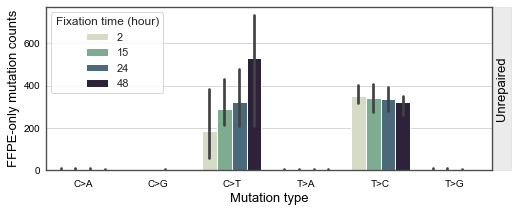

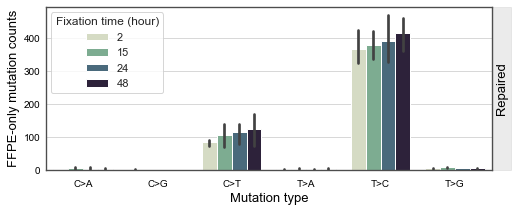

In [6]:
## all FFPE-only mutations
df_unrepaired_mut = bar_plot_sixtype_4timelines("Unrepaired", file = "./Figures/SFig1a.pdf")
df_repaired_mut = bar_plot_sixtype_4timelines("Repaired", file = "./Figures/SFig1b.pdf")

Two main types of FFPE-only mutations are C>T and T>C.

In [7]:
## Averaged proportions of six types mutations
whole_channel_fixation_copy = whole_channel_fixation.copy()
whole_channel_fixation_copy['Type'] = [i.split ('@')[0] for i in whole_channel_fixation_copy.index]
basicTypes_whole_channel_sum = whole_channel_fixation_copy.groupby('Type').sum().T

for tag in ["Unrepaired", "Repaired"]:
    ind = [tag in i for i in basicTypes_whole_channel_sum.index]
    df_tmp = basicTypes_whole_channel_sum.loc[ind,:]
    df_tmp.sum()
    print ("\n", tag,'(averaged proportion):')
    print (df_tmp.apply(lambda col: col/df_tmp.sum(axis = 1)).mean())


 Unrepaired (averaged proportion):
Type
C>A    0.005618
C>G    0.001089
C>T    0.448349
T>A    0.003374
T>C    0.535112
T>G    0.006459
dtype: float64

 Repaired (averaged proportion):
Type
C>A    0.007571
C>G    0.001517
C>T    0.211032
T>A    0.005572
T>C    0.763315
T>G    0.010993
dtype: float64


## 1.2  FFPE-only C>T mutations

Look into FFPE-only C>T mutations and check the effect of formalin fixation time on C>T mutation load accumulation.

Unrepaired 
C>T mutations:
	slope:7.48	Intercept:164.81
Repaired 
C>T mutations:
	slope:0.80	Intercept:89.68


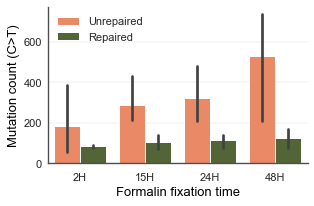

In [8]:
df_combined = pd.concat((df_unrepaired_mut.loc[df_unrepaired_mut.Types == "C>T", :], 
                         df_repaired_mut.loc[df_repaired_mut.Types == "C>T", :] ))
df_combined['Time'] = [str(t) + "H" for t in df_combined["Fixation_time(Hour)"]]
df_combined['Label'] = [i.split(".")[1] for i in df_combined['ID']]

for tag in ["Unrepaired", "Repaired"]:
    print (tag,"\nC>T mutations:")
    x = np.array(df_combined['Fixation_time(Hour)'][df_combined['Label'] == tag])
    y =  np.array(df_combined['Counts'][df_combined['Label'] == tag])

    m, b = np.polyfit(x, y, 1)
    print (f"\tslope:{m:.2f}\tIntercept:{b:.2f}")

## plot
sns.set(style="whitegrid", color_codes=True, rc={"grid.linewidth": 0.2, 'grid.color': '.7', 
                                                 'ytick.major.size': 2,'axes.edgecolor': '.3', 
                                                 'axes.linewidth': 1.35,})
sns.catplot(x="Time", y="Counts", hue="Label", data=df_combined,  height=3, aspect=1.5,
            palette=['coral','darkolivegreen'], order = ["2H","15H","24H","48H"], 
            legend= None, kind = "bar")
sns.despine()

plt.legend(loc='upper left', frameon = False)
plt.xlabel ("Formalin fixation time", size = 13, color = "black")
plt.ylabel ('Mutation count (C>T)', size = 13, color = "black")
plt.savefig ("./Figures/Fig1a.pdf", bbox_inches = "tight", dpi = 300)
plt.show()

## 1.3 FFPE-only T>C mutations

Look into FFPE-only T>C mutations and check the effect of formalin fixation time on T>C mutation load accumulation.

In [9]:
## Only C>T mutations:
df_combined = pd.concat((df_unrepaired_mut.loc[df_unrepaired_mut.Types == "T>C", :], 
                         df_repaired_mut.loc[df_repaired_mut.Types == "T>C", :] ))
df_combined['Time'] = [str(t) + "H" for t in df_combined["Fixation_time(Hour)"]]
df_combined['Label'] = [i.split(".")[1] for i in df_combined['ID']]

for tag in ["Unrepaired", "Repaired"]:
    print (tag,"\nT>C mutations:")
    x = np.array(df_combined['Fixation_time(Hour)'][df_combined['Label'] == tag])
    y =  np.array(df_combined['Counts'][df_combined['Label'] == tag])
    
    m, b = np.polyfit(x, y, 1)
    print (f"\tslope: {m:.2f}\tIntercept: {b:.2f}")

Unrepaired 
T>C mutations:
	slope: -0.63	Intercept: 350.85
Repaired 
T>C mutations:
	slope: 1.02	Intercept: 364.62


In [10]:
df_combined.groupby(["Label","Time"])["Counts"].mean()

Label       Time
Repaired    15H     377.666667
            24H     389.666667
            2H      368.000000
            48H     414.000000
Unrepaired  15H     340.000000
            24H     338.333333
            2H      349.333333
            48H     320.000000
Name: Counts, dtype: float64

# 2. FFPE-only mutations in study 2

We also checked FFPE-only mutations in [study 2](https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6056-8). The FFPE-only mutations are those not discovered in matched FF samples. VCF files could be achieved upon request from the authors in the original paper. Here we only included the preprocssed mutation counts.

In [11]:
disconcordant_S2= pd.read_csv ("./Data/study2_FFPEonly_mutCounts.csv", index_col = "MutationType", sep = "\t")
new_col_s2 = ["S2." + ind.split("-")[0] for ind in disconcordant_S2.columns.values]
new_col_s2 = [re.sub("QGR","Repaired", ind) for ind in new_col_s2]
new_col_s2 = [re.sub("QA","Unrepaired", ind) for ind in new_col_s2]
disconcordant_S2.columns = new_col_s2
disconcordant_S2.head(2)

,S2.A_Repaired,S2.A_Unrepaired,S2.B_Repaired,S2.B_Unrepaired,S2.C_Repaired,S2.C_Unrepaired,S2.D_Repaired,S2.D_Unrepaired
MutationType,,,,,,,,
C>A@A_A,1,0,2,0,1,2,2,1
C>A@A_C,0,0,1,0,0,0,0,0


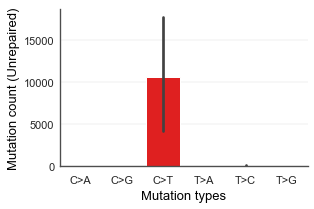

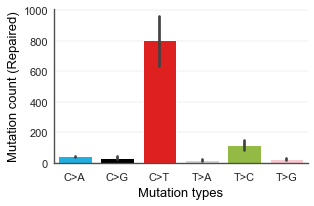

In [12]:
disconcordant_S2['Type'] = [i.split ('@')[0] for i in disconcordant_S2.index]
basicTypes_S2_sum = disconcordant_S2.groupby('Type').sum().T
color = ['deepskyblue','black','red','lightgrey','yellowgreen','pink']
basic_types = ['C>A', 'C>G', 'C>T', 'T>A', 'T>C', 'T>G']
color_dict = {}

sns.set(style="whitegrid", color_codes=True, rc={"grid.linewidth": 0.2, 'grid.color': '.7', 
                                                 'ytick.major.size': 2,'axes.edgecolor': '.3', 
                                                 'axes.linewidth': 1.35,})
for i,t in enumerate(basic_types):
    color_dict [t] = color[i]
    
for tag in ["Unrepaired", "Repaired"]:
    ind = [tag in i for i in basicTypes_S2_sum.index]
    df_tmp = pd.melt(basicTypes_S2_sum.loc[ind,:])
    sns.catplot(x="Type", y="value", data=df_tmp,  height=3, aspect=1.5,
             kind = "bar", order = basic_types, palette= color_dict)
    sns.despine()
    plt.xlabel ("Mutation types", size = 13, color = "black")
    plt.ylabel (f'Mutation count ({tag})', size = 13, color = "black")
    if tag == "Unrepaired":
        plt.savefig("./Figures/SFig2a.pdf", bbox_inches = "tight", dpi = 300)
    elif tag == "Repaired":
        plt.savefig("./Figures/SFig2b.pdf", bbox_inches = "tight", dpi = 300)
    plt.show()


In [13]:
## Averaged proportions for six mutation types in study2.
for tag in ["Unrepaired", "Repaired"]:
    ind = [tag in i for i in basicTypes_S2_sum.index]
    df_tmp = basicTypes_S2_sum.loc[ind,:]
    df_tmp.sum()
    print ("\n", tag,'(Averaged proportions):')
    print (df_tmp.apply(lambda col: col/df_tmp.sum(axis = 1)).mean())  


 Unrepaired (Averaged proportions):
Type
C>A    0.002047
C>G    0.000947
C>T    0.988608
T>A    0.001845
T>C    0.005469
T>G    0.001084
dtype: float64

 Repaired (Averaged proportions):
Type
C>A    0.041673
C>G    0.034601
C>T    0.765765
T>A    0.017901
T>C    0.115518
T>G    0.024542
dtype: float64


# 3. Study C>T and T>C mutation concordance frequency

Both study 1 and study 2 agreed that C>T are dominant in FFPE-only mutations. But large amount of T>C mutations are only found in study 1. Therefore, we checked the concordant mutation frequency of C>T and T>C in study 1. 

In [14]:
## Load complete variants data from fixition group in study 1
fix_mutations = pd.read_csv("./Data/fixiationgroup.txt", sep = "\t")
fix_mutations.head(2)

,Run,Patient_ID,Extraction_method,Time_in_FFPE,Chr,Position,Ref,Alt,Score,Coverage,VAF,Gene,Codon
0,Run166,1,Fresh_frozen_DNA,Frozen_Tumour,chr11,533812,A,G,"0,59",13242,"0,42",HRAS,F82L
1,Run166,1,Mineral_Oil,2H,chr11,533813,C,A,"0,51",21009,"0,24",HRAS,V81V


Preprocessing data: adding columns and getting unique set of mutations from different sequence runs:

In [15]:
## add uniq mutation IDs
cols = ['Chr', 'Position', 'Ref','Alt']
fix_mutations['mutation'] = fix_mutations[cols].apply(lambda row: '.'.join(row.values.astype(str)), axis=1)

## modified Ref for six basic mutation types
fix_mutations['mRef'] = fix_mutations.Ref.where(~(fix_mutations.Ref=='A'),'T')
fix_mutations['mRef'] = fix_mutations.mRef.where(~(fix_mutations.Ref=='G'),'C')

## modified Ref for six basic mutation types
pair = {'A':'T','T':'A','G':'C', 'C':'G'}
comp_Alt = [pair[nt] for nt in fix_mutations.Alt]

fix_mutations['mAlt'] = fix_mutations.Alt.where(~(fix_mutations.Ref=='A'), comp_Alt)
fix_mutations['mAlt'] = fix_mutations.mAlt.where(~(fix_mutations.Ref=='G'), comp_Alt)

## combine the two new columns to the known six mutation types
fix_mutations['mutation_type'] = fix_mutations.mRef + ">" +  fix_mutations.mAlt

## group the data to the C>T, T>C and other mutations
fix_mutations["main_mutation_type"] = "Others"
fix_mutations["main_mutation_type"] = fix_mutations["main_mutation_type"].where(~(fix_mutations.mutation_type == "C>T"), "C>T")
fix_mutations["main_mutation_type"] = fix_mutations["main_mutation_type"].where(~(fix_mutations.mutation_type == "T>C"), "T>C")

## add condition to tranlate the experiment condition
fix_mutations['Condition'] = fix_mutations.Extraction_method.where (fix_mutations.Extraction_method != "Fresh_frozen_DNA",'Fresh')
fix_mutations['Condition'] = fix_mutations.Condition.where (fix_mutations.Condition != "Mineral_Oil",'Unrepaired_FFPE')
fix_mutations['Condition'] = fix_mutations.Condition.where (fix_mutations.Condition != "UNG_GeneRead",'Repaired_FFPE')
fix_mutations['Condition'] = fix_mutations['Condition'] + "." + fix_mutations['Time_in_FFPE']

## add key_id include cols information
cols = ['Patient_ID','Condition','Chr', 'Position', 'Ref','Alt']
fix_mutations['key_id'] = fix_mutations[cols].apply(lambda row: '.'.join(row.values.astype(str)), axis=1)

## get unique set of mutations over 3 runs for each condition per patient.
mut_dict = {}
drop_index = []
for i in fix_mutations.index:
    key = fix_mutations.key_id[i]
    if mut_dict.get(key,'') != '':
        drop_index.append(i)
    else:
        mut_dict[key] = 1

fix_mutations_uq = fix_mutations.drop(drop_index, axis = 0)
print (fix_mutations_uq.shape)
fix_mutations_uq.head(2)

(53429, 20)


,Run,Patient_ID,Extraction_method,Time_in_FFPE,Chr,Position,Ref,Alt,Score,Coverage,VAF,Gene,Codon,mutation,mRef,mAlt,mutation_type,main_mutation_type,Condition,key_id
0,Run166,1,Fresh_frozen_DNA,Frozen_Tumour,chr11,533812,A,G,"0,59",13242,"0,42",HRAS,F82L,chr11.533812.A.G,T,C,T>C,T>C,Fresh.Frozen_Tumour,1.Fresh.Frozen_Tumour.chr11.533812.A.G
1,Run166,1,Mineral_Oil,2H,chr11,533813,C,A,"0,51",21009,"0,24",HRAS,V81V,chr11.533813.C.A,C,A,C>A,Others,Unrepaired_FFPE.2H,1.Unrepaired_FFPE.2H.chr11.533813.C.A


## 3.1 Concordant mutation frequency within patient

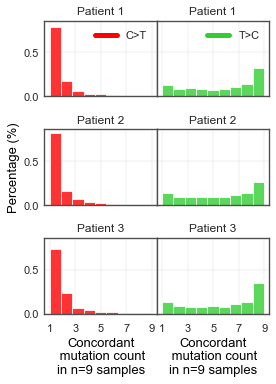

Prop. of C>T mutations found in > 1 sample for 3 patients: [0.29319372 0.27070707 0.34901159], Mean: 0.304
Prop. of T>C mutations found in > 1 sample for 3 patients: [0.88387097 0.87600768 0.88548208], Mean: 0.882


In [16]:
colors = ['red','limegreen','steelblue']
mut_type_group = ['C>T', 'T>C']
fig_index = []
for i in range(3):
    for j in range(2):
        fig_index.append ((i,j))

fig,axs = plt.subplots(3,2, sharex=True, sharey=True, figsize=(4,5.5),
                       gridspec_kw={ 'wspace': 0})
n = 0
overlap_ratios = [] ## record how many percent of variant have been reported in more than one samples
name_overlap_ratios = []
for patient in [1,2,3]:
    nc = 0
    
    for mut_type in mut_type_group:
        df1 = fix_mutations_uq[fix_mutations_uq.Patient_ID == patient]
        df2 = df1[df1.main_mutation_type == mut_type]
        X1 = df2.mutation.value_counts()
        overlap_ratios.append (1-sum(X1==1)/len(X1))
        name_overlap_ratios += [str(patient) +'.'+ mut_type] 
        axs[fig_index[n]].hist(X1, color = colors[nc], density=True, edgecolor = "w", alpha = 0.8, bins=9)
        if n in [2]:
            axs[fig_index[n]].set_ylabel("Percentage (%)", color = "black", size = 13)
        
        if n in [4,5]:
            axs[fig_index[n]].set_xlabel("Concordant\n mutation count\nin n=9 samples",color = "black", size = 13)
        if n in [0,1]:
            custom_lines = [Line2D([0], [0], color = colors[nc], lw = 5)]
            axs[fig_index[n]].legend(custom_lines, [f"{mut_type}"], frameon=False)
            
        
        axs[fig_index[n]].set_title(f"Patient {patient}")
            
        nc += 1
        n += 1
plt.xticks([1,3,5,7,9])
plt.tight_layout()
plt.savefig ("./Figures/SFig3a.pdf", bbox_inches = "tight", dpi = 300)
plt.show()

for t in mut_type_group:
    values = np.array(overlap_ratios)[[t in i for i in name_overlap_ratios]]
    print (f'Prop. of {t} mutations found in > 1 sample for 3 patients: {values}, Mean: {np.mean(values):.3f}')

## 3.2 Concordant mutation frequency between all sample pairs

The comparison is made through all samples of intra and inter patients.

In [17]:
def get_pairwise_data_matrix_prop (data, group_id, row_label, col_label):
    df = data.get_group(group_id)
    n_row = len(row_label)
    n_col = len(col_label)
    collect_comp_data = np.zeros(shape = (n_row,n_col))
    
    for i, row in enumerate(row_label):
        for j, col in enumerate(col_label):
            ## select rows have i and j, then count the mutation frequencies, sum up those freq == 2, 
            ##representing overlaps
            df1 = df.loc[df.all_setting == row,'mutation']
            df2 = df.loc[df.all_setting == col,'mutation']
            frames = [df1,df2]
            df12 = pd.concat(frames)
            collect_comp_data[i,j] = np.sum(df12.value_counts() == 2) / len(df12.unique())

    return collect_comp_data

def anno_heatmap_prop (data, xlabel, ylabel, file = False, h = 17, w = 17, anno = True, anno_font = 10, 
                       label_font = 10):
    sns.set()
    # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(h, w))
    
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    
    sns.heatmap(data, annot = anno, fmt=".1f", vmin=0, vmax=1, cmap = cmap, linewidths=.2, ax=ax, 
                cbar_kws = {'shrink': .5, 'ticks' : np.linspace(0, 1,5), 
                            'label': f"Concordant mutation ratio"}, # 'use_gridspec': False, 'location': 'top'
                annot_kws={"size": anno_font})
    for start, mut_type, col in zip([0, 0.5],["C>T", "T>C"],["red","limegreen"]):
        left, width = start + 0.001, 0.5 - 0.002
        bottom, height = -0.06, 0.05
        right = left + width
        top = bottom + height
        axe = plt.gca()
        p = plt.Rectangle((left, bottom), width, height, fill=True, color = col, alpha = 0.7)
        p.set_transform(axe.transAxes)
        axe.text(0.5 * (left + right), 0.5 * (bottom + top), mut_type, color = "black", size = 13,weight = "bold",
                horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
        p.set_clip_on(False)
        ax.add_patch(p)
    
    ax.set_xticklabels(xlabel, rotation = 0, size = label_font)
    ax.set_yticklabels(ylabel, size = label_font)
    
    ax.tick_params(top = True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right", rotation=-90, rotation_mode="anchor")
    if file:
        plt.savefig(file, bbox_inches = "tight", dpi = 300 )
    plt.show()

In [18]:
fix_mutations_uq['all_setting'] = fix_mutations_uq.Patient_ID.astype(str) + "." + fix_mutations_uq.Condition
condition_group = ['Fresh.Frozen_Tumour','Repaired_FFPE.2H',
                   'Repaired_FFPE.15H','Repaired_FFPE.24H',
                   'Repaired_FFPE.48H','Unrepaired_FFPE.2H',
                   'Unrepaired_FFPE.15H', 'Unrepaired_FFPE.24H',
                   'Unrepaired_FFPE.48H']
all_settings = []
for i in [1,2,3]:
    for j in condition_group:
        all_settings.append(str(i) +"."+ j)

comp_groups = fix_mutations_uq.groupby(["main_mutation_type"])
C2T_G1_matrix_prop = get_pairwise_data_matrix_prop(comp_groups, "C>T", row_label = all_settings, 
                                                   col_label = all_settings)
T2C_G1_matrix_prop = get_pairwise_data_matrix_prop(comp_groups, "T>C", 
                                                   row_label = all_settings, col_label = all_settings)

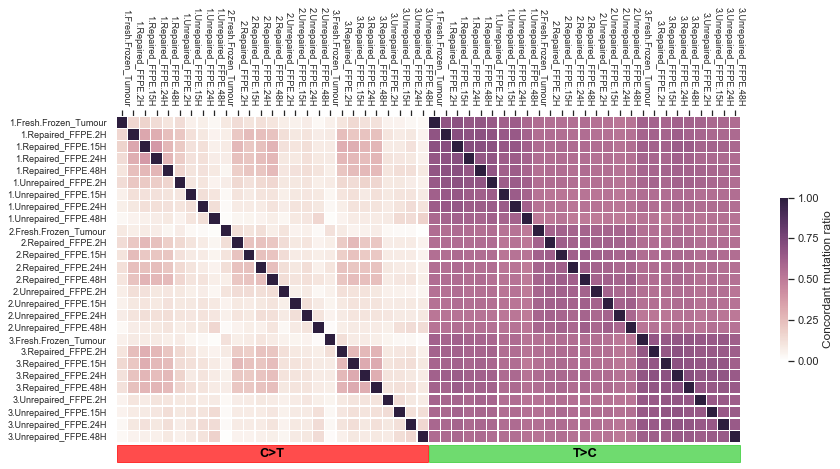

In [19]:
anno_heatmap_prop(np.concatenate([C2T_G1_matrix_prop, T2C_G1_matrix_prop], axis = 1),
                  file = "./Figures/SFig3b.pdf",
                  xlabel=list(all_settings) + list(all_settings), ylabel=all_settings,
                  h = 14, w = 6,anno = False, label_font = 9)

In [20]:
mean_C2T = np.mean(C2T_G1_matrix_prop[np.triu_indices_from(C2T_G1_matrix_prop, k=1)])
mean_T2C = np.mean(T2C_G1_matrix_prop[np.triu_indices_from(T2C_G1_matrix_prop, k=1)])
print (
 f'Average pairwise concordant mutation ratio for C>T :{mean_C2T:.3f}, for T>C :{mean_T2C:.3f}')

Average pairwise concordant mutation ratio for C>T :0.123, for T>C :0.585


T>C mutations are also discovered in fresh frozen samples. And more than half of the same T>C mutations are discovered in sample pairs. Therefore, they are likely from other non-FFPE related error sources.

# 4. Getting mutational opportunities

We next will merge all data from study 1 and study 2 to explore FFPE signatures. But before merging, we need to normalize the mutation profiles and map data to genome-scale sequence contexts.

## 4.1 Mutational opportunity for targeted regions in study 1

+ go to https://www.ncbi.nlm.nih.gov/sites/batchentrez

+ Paste IDs from the paper (Formalin fixation increases deamination mutation signature but should not lead to false positive mutations in clinical practice) to GeneID.txt
 
+ Upload file in the website and retrieve sequence files.

In [21]:
def parse_FA(file = ""):
    fa_IDs = []
    fa_seq = []
    new_seq = ''

    with open (file, "r") as f:
        for line in f:
            if line[0] == ">":
                fa_IDs.append(line.strip())
                if new_seq != '':
                    fa_seq.append(new_seq)
                new_seq = ''
            
            else:
                line = line.strip()
                new_seq = new_seq + line
    ## read the last ID's sequence
    fa_seq.append(new_seq)    
    return fa_IDs, fa_seq

def generate_SBS_channels(): 
    #### making 96 channels
    nt = np.array(['A','C','G','T'])
    pyrimidines = ['C','T']

    ## make the six mut type first
    six_mut_types = generate_six_basictypes()

    ## make the 16 combinations of contexts.
    sixteen_contexts = []
    for context_5p in nt:
        for context_3p in nt:
            sixteen_contexts.append(context_5p + "_" + context_3p)
    ## generate 96 channels and a dict instance to count on numbers
    SBS_channels = []
    SBS_channels_dict = {}
    for mut in six_mut_types:
        for context in sixteen_contexts:
            SBS_channels.append(mut + "@" + context)
            SBS_channels_dict [mut + "@" + context] = 0
    return SBS_channels, SBS_channels_dict

def generate_six_basictypes ():
    nt = np.array(['A','C','G','T'])
    pyrimidines = ['C','T']
    six_mut_types = []
    for pyrimidine in pyrimidines:
        nonself= nt [nt != pyrimidine]
        [six_mut_types.append(pyrimidine + ">" + i) for i in nonself]
    return six_mut_types

def get_feature_from_triplets (triplets):
    four_nts = 'ATGC'
    six_mut_types = generate_six_basictypes()
    if sum([four_nts.count(i) == 1 for i in triplets]) != 3:
        print 
        return "skip"
    
    context_5p, nt, context_3p = triplets[0], triplets[1], triplets[2]
    
    pyrimidines = 'CT'
    pair = {'A':'T','T':'A','G':'C', 'C':'G'}
    
    if nt == 'C':
        possible_mut_types = six_mut_types[:3]        
        return [mut_type + "@" + context_5p + "_" + context_3p for mut_type in possible_mut_types]
    if nt == 'T':
        possible_mut_types = six_mut_types[3:]        
        return [mut_type + "@" + context_5p + "_" + context_3p for mut_type in possible_mut_types]
    if nt == 'G':
        possible_mut_types = six_mut_types[:3]
        return [mut_type + "@" + pair[context_3p] + "_" + pair[context_5p] for mut_type in possible_mut_types]
    if nt == 'A':
        possible_mut_types = six_mut_types[3:]
        return [mut_type + "@" + pair[context_3p] + "_" + pair[context_5p] for mut_type in possible_mut_types]
    
## Read the fasta file of targeted regions.
def Extract_feature_from_FA(file):
    IDs, Sequences = parse_FA(file = file)
    SBS_channels, SBS_channels_dict = generate_SBS_channels()
    
    ## Go over the sequences and count the opportunities
    for seq in Sequences:
        for i in range (1,len(seq) - 1):
            possible_mut_channels = get_feature_from_triplets(seq[i-1:i+2])
            for channel in possible_mut_channels:
                SBS_channels_dict[channel] += 1
    
    ## go over the list and correct the order of dict.
    SBS_channels_dict
    SBS_count = []
    for channel in SBS_channels:
        SBS_count.append(SBS_channels_dict[channel])
    return (SBS_count)

In [22]:
opportunity_TargetCRC = Extract_feature_from_FA(file = "./Data/study1_gene_seq.fa")

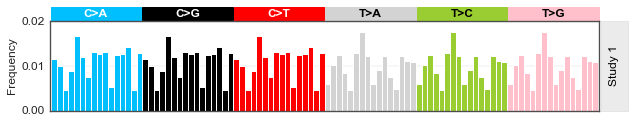

In [23]:
SBS96_plot(opportunity_TargetCRC, name = "", label = "Study 1\n", file = "./Figures/SFig4_1.pdf",
            norm = "True", width = 9, height = 1.9, s = 12)

## 4.2 Mutational opportunity for study 2

In [24]:
opportunity_TargetBRCA = Extract_feature_from_FA(file = "./Data/study2_gene_seq.fa")

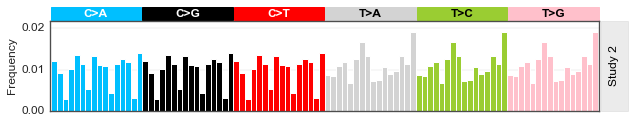

In [25]:
SBS96_plot(opportunity_TargetBRCA, name = "", label = "Study 2\n", file = "./Figures/SFig4_2.pdf", 
                    norm = "True", width = 9, height = 1.9, s = 12)

## 4.3 WGS mutational opptunity 

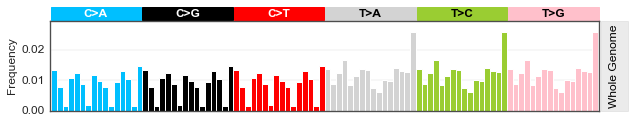

In [26]:
wgs_opp_df = pd.read_csv("./Data/WGS_opp.csv")
wgs_opp = wgs_opp_df['Probability'].values
SBS96_plot(wgs_opp, name = "", label = "Whole Genome\n", file = "./Figures/SFig4_3.pdf", 
                    norm = "True", width = 9, height = 1.9, s = 12,
                    bar_width = 1)

# 5. Normlize data from two studies and merge both

## 5.1 Merge and normalize data from study 1

In [27]:
## fixation group: Mineral_Oil->Unrepaired; UNG_GeneRead ->Repaired : 
## whole_channel_fixation

## baseline group: GeneRead - kit1; QIAmp -> kit2, UNG -> Repaired; No_UNG -> Unrepaired.
whole_channel_baseline = pd.read_csv("./Data/study1_BaselineGroup_mutCounts.csv", sep = "\t", 
                                     index_col = "MutationType")

## Blockage group: Mineral_Oil->Unrepaired; UNG_GeneRead ->Repaired
whole_channel_blockage = pd.read_csv("./Data/study1_BlockageGroup_mutCounts.csv", sep = "\t", 
                                     index_col = "MutationType")

## Merge all three groups
threegroups = [whole_channel_fixation, whole_channel_baseline, whole_channel_blockage]
whole_channels_s1 = pd.concat(threegroups,axis = 1).T
new_index_s1 = [re.sub("_FFPE", "", ind) for ind in whole_channels_s1.index.values]
new_index_s1 = ["S1." + re.sub("\.","_",ind) for ind in new_index_s1]
whole_channels_s1.index = new_index_s1
whole_channels_s1.head(2)

MutationType,C>A@A_A,C>A@A_C,C>A@A_G,C>A@A_T,C>A@C_A,C>A@C_C,C>A@C_G,C>A@C_T,C>A@G_A,C>A@G_C,...,T>G@C_G,T>G@C_T,T>G@G_A,T>G@G_C,T>G@G_G,T>G@G_T,T>G@T_A,T>G@T_C,T>G@T_G,T>G@T_T
S1.1_Unrepaired_2H,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
S1.1_Repaired_15H,0,0,0,0,0,0,0,0,4,0,...,1,0,0,1,0,0,0,0,1,0


In [28]:
## Normalisation
def transfer_sig(from_sig, from_opp, to_opp = wgs_opp):
    to_sig = from_sig / from_opp * to_opp
    to_sig = to_sig / np.sum(to_sig)
    return (to_sig)

## transfer the mutational probabilities to WGS sequence context:
whole_channels_s1_transferred = whole_channels_s1.apply(lambda row: transfer_sig(
    from_sig = row,
    from_opp = np.array (opportunity_TargetCRC), 
    to_opp = wgs_opp), axis = 1)

## Split the data to T>C channels and nonT>C channels:

T2C_ind = ["T>C" in ind for ind in whole_channel_fixation.index]
T2C_channels_sum = whole_channels_s1_transferred.loc[:, T2C_ind].sum(axis = 1)
T2C_channels_s1_transferred_norm = whole_channels_s1_transferred.loc[:, T2C_ind].apply(
    lambda col: col / T2C_channels_sum)

reverse_T2C_ind = ["T>C" not in ind for ind in whole_channel_fixation.index]
nonT2C_channels_s1_transferred_norm = whole_channels_s1_transferred.loc[:, reverse_T2C_ind].apply(
    lambda col: col / (1 - T2C_channels_sum))

## 5.2 normalize and transfer data from study 2

In [29]:
## same process performed on data from study 2.
whole_channels_s2_transferred = disconcordant_S2.drop(columns = "Type").T.apply(
    lambda row: transfer_sig(from_sig = row, 
    from_opp = np.array (opportunity_TargetBRCA), 
    to_opp = wgs_opp), axis = 1)

T2C_channels_sum = whole_channels_s2_transferred.loc[:, T2C_ind].sum(axis = 1)
T2C_channels_s2_transferred_norm = whole_channels_s2_transferred.loc[:, T2C_ind].apply(
    lambda col: col / T2C_channels_sum)

nonT2C_channels_s2_transferred_norm = whole_channels_s2_transferred.loc[:, reverse_T2C_ind].apply(
    lambda col: col / (1 - T2C_channels_sum))

## 5.3 Merge all FFPE samples

### 5.3.1 NonT>C channels

In [30]:
nonT2C_channels_combined = pd.concat((nonT2C_channels_s1_transferred_norm,nonT2C_channels_s2_transferred_norm))
nonT2C_channels_combined.head(2)

MutationType,C>A@A_A,C>A@A_C,C>A@A_G,C>A@A_T,C>A@C_A,C>A@C_C,C>A@C_G,C>A@C_T,C>A@G_A,C>A@G_C,...,T>G@C_G,T>G@C_T,T>G@G_A,T>G@G_C,T>G@G_G,T>G@G_T,T>G@T_A,T>G@T_C,T>G@T_G,T>G@T_T
S1.1_Unrepaired_2H,0.015961,0.0,0.0,0.016648,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.01115,0.0,0.0,0.0,0.015340,0.0
S1.1_Repaired_15H,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.069947,0.0,...,0.017967,0.0,0.0,0.016184,0.00000,0.0,0.0,0.0,0.026055,0.0


Apply t-SNE to cluster the non T>C mutations:

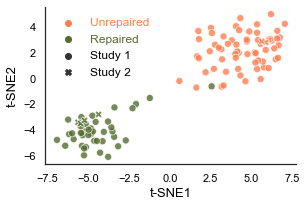

In [31]:
n1, n2 = nonT2C_channels_s1_transferred_norm.shape[0], nonT2C_channels_s2_transferred_norm.shape[0]
n = n1 + n2
repair_ind = ["_Repaired" in ind for ind in nonT2C_channels_combined.index]
unrepair_ind = ["_Unrepaired" in ind for ind in nonT2C_channels_combined.index]
tags = np.array (['Unrepaired'] * n)
tags[repair_ind] = 'Repaired'

tsne = TSNE( metric = "cosine", random_state = 12)
X_embedded = tsne.fit_transform(nonT2C_channels_combined)

df_targeted = pd.DataFrame (X_embedded, columns= ["t_SNE1","t_SNE2"])
df_targeted['Groups'] = tags
df_targeted['Data resource'] = ["Study 1"] * n1 + ['Study 2'] * n2
df_targeted.head()

sns.set(style='white', context='notebook', rc={'figure.figsize':(4.5,2.9)})
palette = ['coral','darkolivegreen']
ax = sns.scatterplot(x = "t_SNE1", y = "t_SNE2", hue = 'Groups', style = "Data resource", data = df_targeted,
                     palette = palette, alpha = 0.8, s = 50)
sns.despine()

text_color =  palette + ['black','black',"black"]

plt.xlabel("t-SNE1", color = "black", size = 13)
plt.ylabel ("t-SNE2", color = "black", size = 13)
plt.xticks( color = "black", size = 11)
plt.yticks ( color = "black", size = 11)

handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(loc = "upper left", handles = handles[1:3] + handles[4:6], 
                labels = labels[1:3] + labels[4:6], frameon=False, fontsize = 12)

for i,text in enumerate(leg.get_texts()):
    text.set_color(text_color[i])
plt.savefig("./Figures/Fig1b.pdf", bbox_inches = "tight", dpi = 300)
plt.show()

### 5.3.2 T>C channels

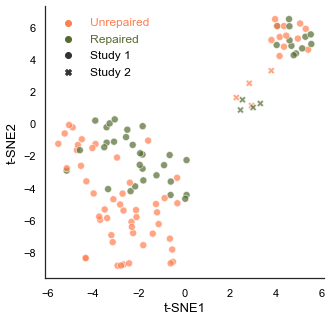

In [32]:
T2C_channels_combined = pd.concat((T2C_channels_s1_transferred_norm,T2C_channels_s2_transferred_norm))
T2C_channels_combined.head(2)
tsne = TSNE( metric = "cosine", random_state = 12)
X_embedded2 = tsne.fit_transform(T2C_channels_combined)

df_targeted2 = pd.DataFrame (X_embedded2, columns= ["t_SNE1","t_SNE2"])
df_targeted2['Groups'] = tags
df_targeted2['Data resource'] = ["Study 1"] * n1 + ['Study 2'] * n2

sns.set(style='white', context='notebook', rc={'figure.figsize':(5, 5)})
palette = ['coral','darkolivegreen']
ax = sns.scatterplot(x = "t_SNE1", y = "t_SNE2", hue = 'Groups', style = "Data resource", data = df_targeted2,
                     palette = palette, alpha = 0.7, s = 50)
sns.despine()
plt.xlabel("t-SNE1", color = "black", size = 13)
plt.ylabel ("t-SNE2", color = "black", size = 13)
plt.xticks( color = "black", size = 11)
plt.yticks ( color = "black", size = 11)

text_color =  palette + ['black','black',"black"]

handles, labels = ax.get_legend_handles_labels()
leg = ax.legend( handles = handles[1:3] + handles[4:6], fontsize = 12,
                labels = labels[1:3] + labels[4:6], frameon=False)
for i,text in enumerate(leg.get_texts()):
    text.set_color(text_color[i])
plt.savefig("./Figures/SFig3c.pdf", bbox_inches = "tight", dpi = 300)
plt.show()

+ T>C mutations from FFPE samples have no uniformed pattern among two types of FFPEs and also among two studies
+ So, we will focus on non T>C mutation channels for FFPE siganture discovery 

## 5.4 Getting FFPE signatures from well-representative samples in t-SNE plots 

We selected well-representative samples depending on t-SNE clustering results. We calculated the spatial density of the clustered data points measured by a gaussian kernel.

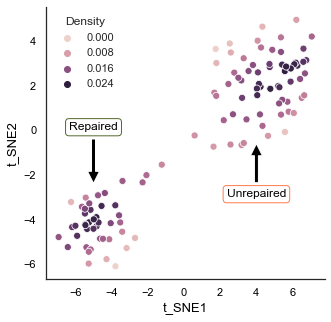

In [33]:
## Get the gaussian kernel density of the t-SNE plots; select those samples with high density.

z = gaussian_kde(X_embedded.T)(X_embedded.T)

sns.set(style='white', context='notebook', rc={'figure.figsize':(5,5)})
fig, ax = plt.subplots()
sns.scatterplot(x = "t_SNE1", y = "t_SNE2", hue = z, data = df_targeted, s = 50)
sns.despine()
plt.xlabel("t_SNE1")
plt.ylabel ("t_SNE2")
plt.annotate("Unrepaired",xy = (4,-0.5), 
              ha='center',
             xytext = (4, -3), size = 12, color = "black",
             bbox=dict(boxstyle="round", fc="none", ec="coral"),
             arrowprops=dict(facecolor='black', shrink=0.05) )
plt.annotate("Repaired",xy = (-5, -2.5), 
              ha='center',
             xytext = (-5, 0), size = 12, color = "black",
             bbox=dict(boxstyle="round", fc="none", ec="darkolivegreen"),
             arrowprops=dict(facecolor='black', shrink=0.05) )
plt.xlabel("t_SNE1", color = "black", size = 13)
plt.ylabel ("t_SNE2", color = "black", size = 13)
plt.xticks( color = "black", size = 11)
plt.yticks ( color = "black", size = 11)
plt.legend (title = "Density", frameon = False)
plt.savefig("./Figures/SFig5a.pdf", bbox_inches = "tight", dpi = 300)

plt.show()

+ We then selected data points (density > 0.018) as well-representative samples, and the averaged values of them is one candidate solution
+ We did the clustering for 100 times using different random seeds. Thus, we got 100 candidates.
+ The average of the 100 candidates is our final FFPE signature.

In [34]:
## run t-SNE 100 times to collect data:
df_rand_repaired, df_rand_unrepaired= pd.DataFrame(), pd.DataFrame()
for i in range (1,101):
    col_id = 'rand_' + str(i)
    
    ## tsne with different random state
    tsne = TSNE( metric = "cosine", random_state = i)
    X_embedded = tsne.fit_transform(nonT2C_channels_combined)
    
    ## density computing
    z = gaussian_kde(X_embedded.T)(X_embedded.T)
    cut_off = 0.018
    selected_samples = nonT2C_channels_combined.index.values[z > cut_off]
    
    ## repaired representatives
    repaired_samples_tmp = selected_samples[["_Repaired" in sample for sample in selected_samples]]
    repaired_ind = [sample in repaired_samples_tmp for sample in nonT2C_channels_combined.index.values]
    repaired_sig_tmp = nonT2C_channels_combined.loc[repaired_ind,:].mean(axis = 0)
    repaired_sig_tmp_norm = repaired_sig_tmp/np.sum(repaired_sig_tmp)
    df_rand_repaired[col_id] = repaired_sig_tmp_norm.values    
    
    ## unrepaired representatives
    unrepaired_samples_tmp = selected_samples[["_Unrepaired" in sample for sample in selected_samples]]
    unrepaired_ind = [sample in unrepaired_samples_tmp for sample in nonT2C_channels_combined.index.values]
    unrepaired_sig_tmp = nonT2C_channels_combined.loc[unrepaired_ind,:].mean(axis = 0)
    unrepaired_sig_tmp_norm = unrepaired_sig_tmp/np.sum(unrepaired_sig_tmp)
    df_rand_unrepaired[col_id] = unrepaired_sig_tmp_norm.values

## give the averaged probabilities from each round as the final FFPE signatures:
ffpe_repaired_sig, ffpe_unrepaired_sig = np.zeros(96), np.zeros(96)
ffpe_repaired_sig[reverse_T2C_ind] = df_rand_repaired.mean(axis = 1).values
ffpe_unrepaired_sig[reverse_T2C_ind] = df_rand_unrepaired.mean(axis = 1).values

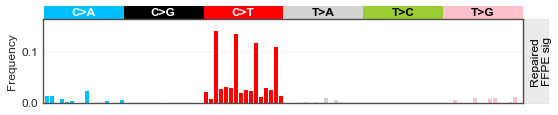

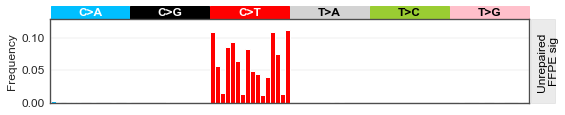

In [35]:
## plot both FFPE signatures:
SBS96_plot (ffpe_repaired_sig, s = 12, label = "Repaired\nFFPE sig", norm = True,
            width = 8, height = 1.8,
            file = "./Figures/SFig5b.pdf", name = '')
SBS96_plot (ffpe_unrepaired_sig, s = 12, label = "Unrepaired\nFFPE sig", 
            width = 8, norm = True, height = 1.8,
            file = "./Figures/SFig5c.pdf", name = '')

In [36]:
## Write the stats summary from the random states of tsne.
df_rand_repaired.index = nonT2C_channels_combined.columns.values
df_rand_unrepaired.index = nonT2C_channels_combined.columns.values

stats_repaired_sig = df_rand_repaired.T.describe().loc[['mean',
                                            "std"]].T.rename(columns = {"mean":"Repaired_sig(mean)",
                                                                        "std":"Repaired_sig(std)"})
stats_unrepaired_sig = df_rand_unrepaired.T.describe().loc[['mean',
                                            "std"]].T.rename(columns = {"mean":"Unrepaired_sig(mean)",
                                                                        "std":"Unrepaired_sig(std)"})

stats_repaired_sig.index.name, stats_unrepaired_sig.index.name = "MutationType", "MutationType"

pd.concat((stats_repaired_sig, stats_unrepaired_sig), axis = 1).to_csv("./Data/FFPE_signatures_stats.csv", 
                                                                       sep = "\t")

## 5.5 Compare FFPE signatures to known SBS signatures (COSMIC V3)

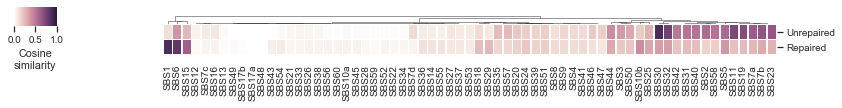

SBS30 vs Unrepaired FFPE sig: [0.9] 
SBS1 vs Repaired FFPE sig: [0.9]


In [37]:
SBS_sig = pd.read_csv("./Data/SBS_signatures.csv")
SBS_sig_values = SBS_sig.iloc[:,2:]

ffpe_sig = pd.DataFrame({"Unrepaired": ffpe_unrepaired_sig, "Repaired":ffpe_repaired_sig})

sns.set(font_scale = 0.9)
sim = cosine_similarity(ffpe_sig.T.values, SBS_sig_values.T)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
result = sns.clustermap(sim, linewidth = 0.5, cmap = cmap, vmin=0, vmax=1,
                        xticklabels = SBS_sig_values.columns.values,
                        yticklabels = ['Unrepaired', "Repaired"],
                        figsize=(11.8,1.5), row_cluster=False,
                        cbar_kws = {'shrink': 0.2, 'ticks' : np.linspace(0,1,3),
                                   "orientation": "horizontal",
                                   'label': f"Cosine\nsimilarity"},
                                    linewidths=0.005,linecolor = "white")
plt.savefig("./Figures/Fig1c.pdf", bbox_inches = "tight", dpi = 300)

plt.show()

## Similarities between SBS30 vs Unrepaired FFPE sig
cs1 = np.round(cosine_similarity(SBS_sig['SBS30'].to_numpy().reshape(1,96),
                                 ffpe_unrepaired_sig.reshape(1,96))[0],2)
## Similarities between SBS1 vs Repaired FFPE sig
cs2= np.round(cosine_similarity(SBS_sig['SBS1'].to_numpy().reshape(1,96),
                                ffpe_repaired_sig.reshape(1,96))[0],2)

print ("SBS30 vs Unrepaired FFPE sig:", cs1, "\nSBS1 vs Repaired FFPE sig:",cs2)

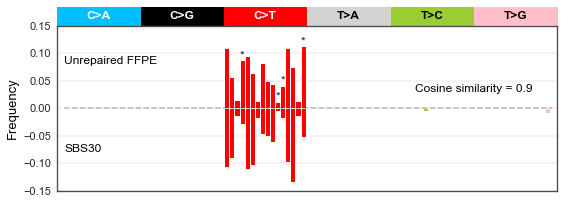

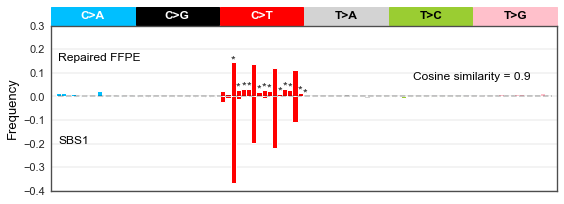

In [38]:
col_set = ['deepskyblue','black','red','lightgrey','yellowgreen','pink']
col_list = []
for i in range (len(col_set)):
     col_list += [col_set[i]] * 16
channel6 = ['C>A','C>G','C>T','T>A','T>C','T>G']

for sig1, sig2, sig1_name,sig2_name, cs in zip([ffpe_unrepaired_sig.copy(),ffpe_repaired_sig.copy()],
                                               [SBS_sig['SBS30'].copy(),SBS_sig['SBS1'].copy()],
                                               ["Unrepaired", "Repaired"],
                                               ["SBS30", "SBS1"], 
                                               [cs1[0], cs2[0]]):

    sns.set(rc={"figure.figsize":(8, 2.9)})
    sns.set(style="whitegrid", color_codes=True, rc={"grid.linewidth": 0.3, 'grid.color': '.7', 
                                                     'ytick.major.size': 2,
                                                     'axes.edgecolor': '.3', 'axes.linewidth': 1.35,})

    plt.bar(np.arange(1,97), sig1, color = col_list, width = 1)
    
    plt.bar(np.arange(1,97), -sig2, color = col_list, width = 1)
        
    plt.hlines (0, 1, 97, linestyle='dashed', alpha = 0.3)
    
    for i in range (33,50):
        if sig1[i-1] >0  and sig2[i-1] > 0:
            if sig1[i-1]/sig2[i-1] > 2 or sig2[i-1]/sig1[i-1] > 2:
                plt.text( i, sig1[i-1] + 0.01, "*", ha = 'center',va='center', size = 12)

    plt.margins(x=0.01, y=0.01)
    plt.xticks ([])
    plt.ylabel("Frequency", color = "black", size = 13)
    
    text_col = ["w","w","w","black","black","black"]
    for i in range(6):
        
        left, width = 0 + 1/6 * i + 0.001, 1/6 - 0.002
        
        bottom, height = 1.003, 0.11
        right = left + width
        top = bottom + height
        ax = plt.gca()
        p = plt.Rectangle((left, bottom), width, height, fill=True, color = col_set[i])
        p.set_transform(ax.transAxes)
        p.set_clip_on(False)
        ax.add_patch(p)
        
        ax.text(0.5 * (left + right), 0.5 * (bottom + top), channel6[i], weight = "bold", 
                color = text_col[i], size = 12,
                horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
        
    plt.tight_layout()
    
    if sig2_name == "SBS30":
        plt.ylim (-0.15,0.15)
        plt.annotate (sig2_name,(1, -0.08), size = 12 , color = "black")
        plt.annotate (sig1_name  + " FFPE",(1, 0.08), size = 12 , color = "black")
        plt.annotate (f"Cosine similarity = {cs}",(70, 0.03), 
                      size = 12, color = "black")
        plt.savefig("./Figures/Fig1d.pdf", bbox_inches = "tight", dpi = 300)
    else:
        plt.ylim (-0.4,0.30)
        plt.annotate (sig2_name,(1, -0.2), size = 12 , color = "black")
        plt.annotate (sig1_name + " FFPE",(1, 0.15), size = 12 , color = "black")
        plt.annotate (f"Cosine similarity = {cs}",(70, 0.07), 
                      size = 12, color = "black")
        plt.savefig("./Figures/Fig1e.pdf", bbox_inches = "tight", dpi = 300)
    
    plt.show()

## 5.6 Compare FFPE sig to COSMIC V2 Sig1 and Sig30

In [39]:
sig1_COSMIC_v2 = np.array([1.10983262e-02, 9.14934073e-03, 1.49007047e-03, 6.23388524e-03,
       6.59587011e-03, 7.34236782e-03, 8.92840370e-04, 7.18658164e-03,
       8.23260399e-03, 5.75802141e-03, 6.16335232e-04, 4.45908031e-03,
       1.22500637e-02, 1.11622293e-02, 2.27549569e-03, 1.52591025e-02,
       1.80106837e-03, 2.58090852e-03, 5.92548022e-04, 2.96398629e-03,
       1.28498345e-03, 7.02134818e-04, 5.06289594e-04, 1.38154272e-03,
       6.02122711e-04, 2.39335221e-03, 2.48534000e-07, 8.90080731e-04,
       1.87485320e-03, 2.06741879e-03, 3.04897004e-04, 3.15157446e-03,
       2.95145327e-02, 1.43227470e-02, 1.71646931e-01, 1.26237632e-02,
       2.08964470e-02, 1.85017048e-02, 9.55772173e-02, 1.71133076e-02,
       2.49438142e-02, 2.71614940e-02, 1.03570762e-01, 1.76898544e-02,
       1.44920996e-02, 1.76807754e-02, 7.60022217e-02, 1.37617040e-02,
       4.02152033e-03, 2.37114416e-03, 2.81090996e-03, 8.36090935e-03,
       1.18258742e-03, 1.90316686e-03, 1.48796063e-03, 2.17934441e-03,
       6.89289439e-04, 5.52409528e-04, 1.20022885e-03, 2.10713684e-03,
       5.60015542e-03, 1.99907926e-03, 1.09006569e-03, 3.98102276e-03,
       1.39157730e-02, 6.27496060e-03, 1.01376362e-02, 9.25631639e-03,
       4.17667488e-03, 5.25259333e-03, 7.01322531e-03, 6.71381312e-03,
       1.12478351e-02, 6.99972426e-03, 4.97759262e-03, 1.06674061e-02,
       8.07361635e-03, 4.85738118e-03, 8.32545421e-03, 6.25710561e-03,
       1.58763642e-03, 1.78409129e-03, 1.38583055e-03, 3.15853931e-03,
       3.02691186e-04, 2.09850244e-03, 1.59954850e-03, 2.75853762e-03,
       9.90450030e-05, 2.02365646e-04, 1.18835318e-03, 8.00723342e-04,
       1.39755375e-03, 1.29173698e-03, 2.03107688e-03, 4.03012816e-03])

sig30_COSMIC_v2 = np.array([0.       , 0.       , 0.0019673, 0.       , 0.       , 0.       ,
       0.0022624, 0.       , 0.008853 , 0.0093449, 0.0008853, 0.0081645,
       0.       , 0.       , 0.0016722, 0.       , 0.       , 0.       ,
       0.00482  , 0.       , 0.       , 0.       , 0.0032461, 0.       ,
       0.0073775, 0.0065906, 0.0015739, 0.       , 0.       , 0.       ,
       0.0019673, 0.       , 0.065119 , 0.054397 , 0.0204604, 0.0219359,
       0.0694472, 0.0638403, 0.0173126, 0.0342318, 0.0485934, 0.0494787,
       0.0157387, 0.0188865, 0.0849892, 0.090301 , 0.0151485, 0.045544 ,
       0.0075743, 0.003738 , 0.0065906, 0.0093447, 0.0053118, 0.0067873,
       0.0082628, 0.       , 0.003738 , 0.0033445, 0.0050167, 0.0063939,
       0.0076726, 0.0064922, 0.0036396, 0.       , 0.       , 0.0087547,
       0.0090498, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.0065906, 0.0078694, 0.0084596, 0.       , 0.0091481,
       0.0060004, 0.       , 0.0053118, 0.0024592, 0.0062955, 0.0095416,
       0.0046233, 0.0060004, 0.0073775, 0.0091481, 0.0032461, 0.001869 ,
       0.0033445, 0.0056069, 0.0086563, 0.0043282, 0.0082628, 0.       ])

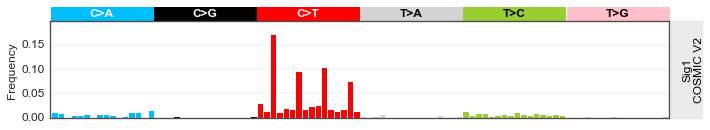

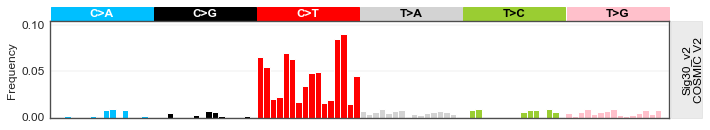

In [40]:
SBS96_plot (sig1_COSMIC_v2, s = 12, label = "Sig1\nCOSMIC V2", norm = True,
                    bar_width = 1,  name = '')
SBS96_plot (sig30_COSMIC_v2, s = 12, label = "Sig30_v2\nCOSMIC V2", norm = True,
                    bar_width = 1,  name = '')

In [41]:
## Similarities between SBS30 vs Unrepaired FFPE sig
cs1_v2 = np.round(cosine_similarity(sig30_COSMIC_v2.reshape(1,96),
                                 ffpe_unrepaired_sig.reshape(1,96))[0][0],2)
## Similarities between SBS1 vs Repaired FFPE sig
cs2_v2 = np.round(cosine_similarity(sig1_COSMIC_v2.reshape(1,96),
                                ffpe_repaired_sig.reshape(1,96))[0][0],2)

print ("Sig30(COSMIC v2) vs Unrepaired FFPE sig:",cs1_v2, "\nSig1(COSMIC v2) vs Repaired FFPE sig:", cs2_v2)

Sig30(COSMIC v2) vs Unrepaired FFPE sig: 0.9 
Sig1(COSMIC v2) vs Repaired FFPE sig: 0.95
